In [3]:
import cmath as cm
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython import display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import matplotlib.ticker as tick
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import scipy as sc

In [3]:
# import image
# from IPython import display
# display.Image("fig_to_include.png", width=400)

# Question 1
<b>Consider a tight-binding model defined on a two-dimensional square lattice of spacing a with
nearest-neighbour hopping integral $t_1$ and next-nearest-neighbour hopping integral $t_2$. You may
assume your system has s-like atomic orbitals. Investigate qualitatively how the Fermi surface
evolves with increasing filling fraction for the case where $t_2=0$. What is the effect of introducing
and varying $t_2$?

In the folllwing, we define the site energy $\epsilon_{at}=0$ for convenience.

Because we have s-like orbitals that are spherically symmetric can assume that the hopping is the same in any of the 4 directions (i.e. $\hat{x}$, -$\hat{x}$, $\hat{y}$ and $\hat{y}$) for both nearest-neighbour and next-nearest-neighbour hopping. Thus, the Hamiltonian we obtain for this square lattice gives the dispersion relation below where $t_1$ is the nearest-neighbour (NN) hopping and $t_2$ is the next nearest-neighbour (NNN) hopping.

## Dispersion relation + square lattice values

In [4]:
def e_k(kx_a, ky_a,t1, t2):
    return -2*t1*(np.cos(kx_a)+np.cos(ky_a)) - 2*t2*(np.cos(kx_a+ky_a)+np.cos(-kx_a+ky_a))
# k*a = {-π,π{
ka_val = np.arange(-np.pi,np.pi,0.05)
X,Y = np.meshgrid(ka_val,ka_val)

Due to the symmetry of the $s$ orbitals, $t_1$ and $t_2$ must have the same sign but $t_2$ must be smaller because the separation between NNN sites is larger than for NN sites.

## Interactive Function

In [5]:
def intr(func):
    %matplotlib inline
    interactive_plot = interactive(func, t1 = (1,3,0.1), t2 = (0,1,0.1))
    output = interactive_plot.children[-1]
    output.layout.height = '500px'
    return interactive_plot

## 3D Dispersion

In [6]:
def drpf3d(t1,t2):
    %matplotlib widget
    E = e_k(X,Y,t1,t2)
    
    E1D = []
    for e in E:
        for i in e:
            E1D = np.append(E1D, i)
    E1Ds = sorted(E1D)
    
    levels = []
    for n in range(1,10):
        r = int(n/10*len(E1Ds))
        levels = np.append(levels, E1Ds[r])
    
    fig, ax = plt.subplots(figsize = (12,6), subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.plasma, alpha=0.6, edgecolor='k', linewidth=0.01, antialiased=False, zorder = 0)
    
    cp = ax.contour(X, Y, E, levels, colors='k', linewidths = 3, zorder = 9)
    fmt = {}
    lvl = np.arange(0.1,1,0.1)
    for l, s in zip(cp.levels, lvl):
        fmt[l] = int(s*10)/10
    ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=100, zorder = 80)
    
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-np.pi,np.pi)
    ax.set_title('Square Lattice Dispersion Relation ($s$ orbitals NN and NNN) BZ $t_1=$'+ str("%.2f" % round(float(t1),2))+' and $t_2=$'+str("%.2f" % round(float(t2),2)), fontsize = 17)
    ax.set_xlabel('$k_x a$', fontsize = 13) # k@\hat(x) = kx*a
    ax.set_ylabel('$k_y a$', fontsize = 13) # k@\hat(y) = ky*a because it is a square lattice
    ax.set_zlabel('$\epsilon$(k)',  fontsize = 13)
    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 1.3, 1]))
    cbar = fig.colorbar(surf, shrink=0.5, aspect = 15, pad = 0.12)
    cbar.set_label('$\epsilon (k)$', rotation=270, y = 0.55) 
    plt.show()
    print('The black contour lines mark the Fermi surface for filling fractions 0.1, 0.2,...,0.8, 0.9.')
#drpf3d(2,0)
intr(drpf3d)

interactive(children=(FloatSlider(value=2.0, description='t1', max=3.0, min=1.0), FloatSlider(value=0.0, descr…

$t_1$ and $t_2$ can be varied in real time by executing intr(drpf3d).

## 2D Contour

In [15]:
def drpfcnt(t1,t2):
    %matplotlib widget
    
    E = e_k(X,Y,t1,t2)
    E1D = []
    for e in E:
        for i in e:
            E1D = np.append(E1D, i)
    E1Ds = sorted(E1D)
    
    levels = []
    for n in range(1,10):
        r = int(n/10*len(E1Ds))
        levels = np.append(levels, E1Ds[r])
    
    ticks = []
    for j in range(0,10):
        r = int(j/10*len(E1Ds))
        ticks = np.append(ticks, E1Ds[r])
    ticks = np.append(ticks, E1Ds[-1])
    
    fig,ax=plt.subplots(figsize = (12,10))
    cp1 = ax.contourf(X, Y, E, ticks, cmap=cm.plasma, alpha = 0.8)
    cp = ax.contour(X, Y, E, levels, colors='k')
    
    fmt = {}
    lvl = np.arange(0.1,1,0.1)
    for l, s in zip(cp.levels, lvl):
        fmt[l] = int(s*10)/10
    ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=10)
     
    cbar2 = fig.colorbar(cp1, ticks =  ticks)
    cbar2.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
    cbar2.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    cbar2.set_label('$\epsilon$ (k)', labelpad = 20, fontsize = 13, rotation=270, y = 0.5)
    ax.set_title('Square Lattice Dispersion Relation ($s$ orbitals NN and NNN) BZ $t_1=$'+str("%.2f" % round(float(t1),2))+' and $t_2=$'+str("%.2f" % round(float(t2),2)), fontsize = 15, y = 1.03)
    ax.set_xlabel('$k_x a$', fontsize = 13)
    ax.set_ylabel('$k_y a$', fontsize = 13)
    plt.show()
    print('The black contour lines mark the Fermi surface for the labelled filling fractions.')
#drpfcnt(2,0)
intr(drpfcnt)

interactive(children=(FloatSlider(value=2.0, description='t1', max=3.0, min=1.0), FloatSlider(value=0.0, descr…

$t_1$ and $t_2$ can be varied in real time by executing intr(drpfcnt).

## Combine

In [8]:
def drcomb(t1,t2):
    %matplotlib widget
    
    E = e_k(X,Y,t1,t2)
    E1D = []
    for e in E:
        for i in e:
            E1D = np.append(E1D, i)
    E1Ds = sorted(E1D)
    levels = []
    for n in range(1,10):
        r = int(n/10*len(E1Ds))
        levels = np.append(levels, E1Ds[r])
    ticks = []
    for j in range(0,10):
        r = int(j/10*len(E1Ds))
        ticks = np.append(ticks, E1Ds[r])
    ticks = np.append(ticks, E1Ds[-1])

    fig = plt.figure(figsize = (15,6))
    fig.suptitle('Square Lattice Dispersion Relation ($s$ orbitals NN and NNN) BZ $t_1=$'+str("%.2f" % round(float(t1),2))+' and $t_2=$'+str("%.2f" % round(float(t2),2)), fontsize = 15)
    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.plasma, alpha=0.6, edgecolor='k', linewidth=0.01, antialiased=False, zorder = 0)
    cp = ax.contour(X, Y, E, levels, colors='k', linewidths = 3, zorder = 9)
    fmt = {}
    lvl = np.arange(0.1,1,0.1)
    for l, s in zip(cp.levels, lvl):
        fmt[l] = int(s*10)/10
    ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=100, zorder = 80)
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-np.pi,np.pi)
    ax.set_xlabel('$k_x a$')
    ax.set_ylabel('$k_y a$')
    ax.set_zticks(np.arange(int(np.min(E))-1,int(np.max(E))+1,2))
       
    ax = fig.add_subplot(1, 2, 2)
    cp1 = ax.contourf(X, Y, E, ticks, cmap=cm.plasma, alpha = 0.8)
    cp = ax.contour(X, Y, E, levels, colors='k')
    fmt = {}
    lvl = np.arange(0.1,1,0.1)
    for l, s in zip(cp.levels, lvl):
        fmt[l] = int(s*10)/10
    ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=10)
    cbar2 = fig.colorbar(cp1, ticks =  ticks)
    cbar2.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
    cbar2.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    cbar2.set_label('$\epsilon$ (k)', labelpad = 20, fontsize = 13, rotation=270, y = 0.5)
    ax.set_xlabel('$k_x a$', fontsize = 13)
    ax.set_ylabel('$k_y a$', fontsize = 13)
    plt.show()
    print('The black contour lines mark the Fermi surface for filling fractions 0.1, 0.2,...,0.8, 0.9.')    
# drcomb(t1,t2)
# intr(drcomb)

## Combine rep

In [10]:
def drcomb_rep(n,t1,t2max):
    %matplotlib widget
    if n == 1:
        drcomb(t1,t2max)
    else:
        c = t2max/(n-1)
        for t2 in np.arange(0,t2max+0.1,c):
            E = e_k(X,Y,t1,t2)
            E1D = []
            for e in E:
                for i in e:
                    E1D = np.append(E1D, i)
            E1Ds = sorted(E1D)
            levels = []
            for n in range(1,10):
                r = int(n/10*len(E1Ds))
                levels = np.append(levels, E1Ds[r])
            ticks = []
            for j in range(0,10):
                r = int(j/10*len(E1Ds))
                ticks = np.append(ticks, E1Ds[r])
            ticks = np.append(ticks, E1Ds[-1])

            fig = plt.figure(figsize = (14,6))
            fig.suptitle('Square Lattice Dispersion Relation ($s$ orbitals NN and NNN) BZ $t_1=$'+str("%.2f" % round(float(t1),2))+' and $t_2=$'+str("%.2f" % round(float(t2),2)), fontsize = 15)

            ax = fig.add_subplot(1, 2, 1, projection='3d')
            surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.plasma, alpha=0.6, edgecolor='k', linewidth=0.01, antialiased=False, zorder = 0)
            cp = ax.contour(X, Y, E, levels, colors='k', linewidths = 3, zorder = 9)
            fmt = {}
            lvl = np.arange(0.1,1,0.1)
            for l, s in zip(cp.levels, lvl):
                fmt[l] = int(s*10)/10
            ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=100, zorder = 80)
            ax.set_xlim(-np.pi,np.pi)
            ax.set_ylim(-np.pi,np.pi)
            ax.set_xlabel('$k_x a$')
            ax.set_ylabel('$k_y a$')
            ax.set_zticks(np.arange(int(np.min(E))-1,int(np.max(E))+1,2))

            ax = fig.add_subplot(1, 2, 2)
            cp1 = ax.contourf(X, Y, E, ticks, cmap=cm.plasma, alpha = 0.8)
            cp = ax.contour(X, Y, E, levels, colors='k')
            fmt = {}
            lvl = np.arange(0.1,1,0.1)
            for l, s in zip(cp.levels, lvl):
                fmt[l] = int(s*10)/10
            ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=10)
            cbar2 = fig.colorbar(cp1, ticks =  ticks)
            cbar2.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
            cbar2.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
            cbar2.set_label('$\epsilon$ (k)', labelpad = 20, fontsize = 13, rotation=270, y = 0.5)
            ax.set_xlabel('$k_x a$', fontsize = 13)
            ax.set_ylabel('$k_y a$', fontsize = 13)
            plt.show()
        print('The black contour lines mark the Fermi surface for filling fractions 0.1, 0.2,...,0.8, 0.9.')    
# drcomb_rep(11,2,1)

As can be seen in the plots above, introducing and varying $t_2$ results in a deformation of the $\epsilon (k)$ surface and consequentially of the Fermi surfaces. Notably, for the chosen range of $t_2$, the Fermi surfaces - for the same filling fractions - are pushed out for higher values of $k$ and those that used to be discontinous within the Brillouin zone (overlapped with neighbouring zones) become continuous within the Brillouin zone.

$t_1$ and $t_2$ can be varied in real time by executing intr(drcomb).

# Question 2
<b>Make a `spaghetti' plot of the energy dispersions from your model along the $\Gamma$-X-M-$\Gamma$ high-symmetry directions of the 2D Brillouin zone. How do these evolve with changing values of $t_1$ and $t_2$? Discuss how changing the values of the hopping parameters might be realised physically.

## High-Symmetry Directions

In [8]:
def hsdir(t1,t2):
    %matplotlib widget
    E = e_k(X,Y,t1,t2)
    
    # Γ-X line
    Xgx = np.arange(0,np.pi,0.05)
    Ygx = Xgx
    Egx = e_k(Xgx,Ygx,t1,t2)
    
    # X-M line
    Yxm = np.flip(Xgx)
    Xxm = np.pi*np.ones(len(Yxm))
    Exm = e_k(Xxm,Yxm,t1,t2)
    
    # M-Γ line
    Xmg = np.flip(Xgx)
    Ymg = np.zeros(len(Xmg))
    Emg = e_k(Xmg,Ymg,t1,t2)
    
    annotations=["Γ","X","M"]
    an_loc=[[0,0,e_k(0,0,t1,t2)],[np.pi,np.pi,e_k(np.pi,np.pi,t1,t2)],[np.pi,0,e_k(np.pi,0,t1,t2)]]

    fig, ax = plt.subplots(figsize = (13,10), subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(X, Y, E, rstride = 2, cstride = 2, cmap=cm.Pastel1, alpha=0.8, edgecolor='k', linewidth=0.01, antialiased=False)

    ax.set_zlim(np.min([np.min(Egx),np.min(Exm),np.min(Emg)])+0.5, np.max([np.max(Egx),np.max(Exm),np.max(Emg)])-0.5)
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-np.pi,np.pi)
    ax.set_title('Square Lattice ($s$ orbitals NN and NNN) BZ Dispersion Relation with High-Symmetry Directions', fontsize = 15, y = 1.06)
    ax.set_zlabel('$\epsilon (k)$')
    ax.set_xlabel('$k_xa$')
    ax.set_ylabel('$k_yb$')
    ax.plot(Xgx, Ygx, Egx, label='Γ-X line', lw = 2.5, zorder = 9)
    ax.plot(Xxm, Yxm, Exm, label='X-M line', lw = 2.5, zorder = 9)
    ax.plot(Xmg, Ymg, Emg, label='M-Γ line', lw = 2.5, zorder = 9)
    for i, label in enumerate(annotations):
        x = an_loc[i][0]
        y = an_loc[i][1]
        z = an_loc[i][2]
        ax.scatter(x,y,z, c='k', s = 70, zorder = 10)
        ax.text(x,y,z,label, c='k', fontsize = 20, weight = 500, zorder = 9)
    ax.legend(loc = 'lower right')

    cbar4 = fig.colorbar(surf, shrink=0.5, aspect=10, pad = 0.07)
    cbar4.set_label('$\epsilon (k)$', rotation=270, y = 0.55)

    plt.show()
#hsdir(2,0)
intr(hsdir)

interactive(children=(FloatSlider(value=2.0, description='t1', max=3.0, min=1.0), FloatSlider(value=0.0, descr…

## Spaghetti plot

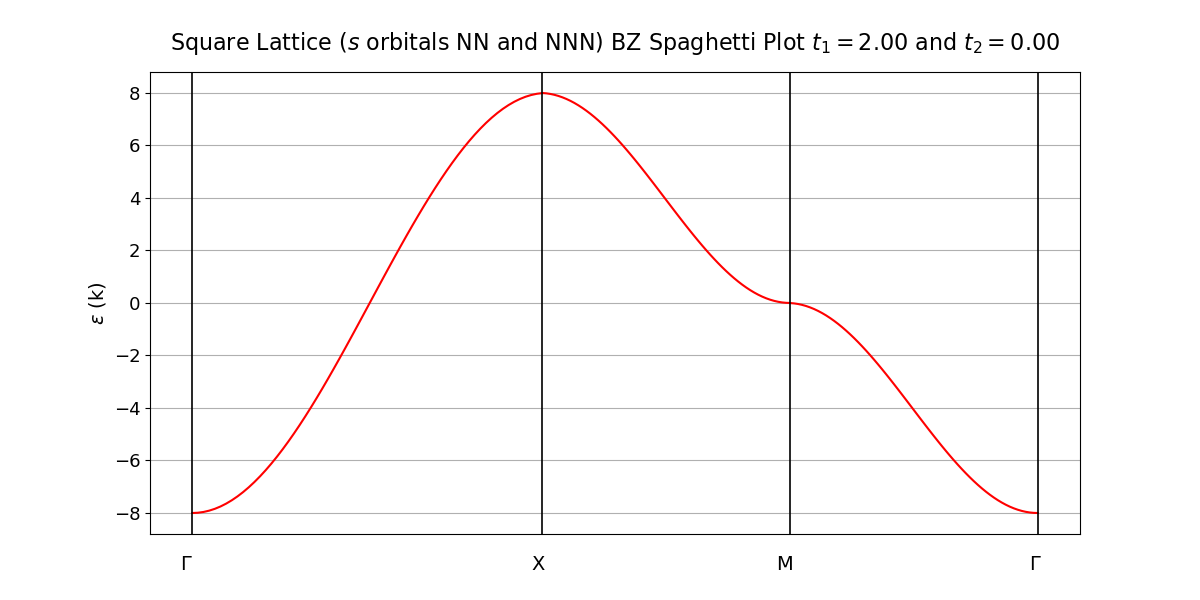

In [15]:
def spaghetti_plot(t1,t2):
    %matplotlib widget
    # Γ-X line
    Xgx = np.arange(0,np.pi,0.05)
    Ygx = Xgx
    Egx = e_k(Xgx,Ygx,t1,t2)
    
    # X-M line
    Yxm = np.flip(Xgx)
    Xxm = np.pi*np.ones(len(Yxm))
    Exm = e_k(Xxm,Yxm,t1,t2)
    
    # M-Γ line
    Xmg = np.flip(Xgx)
    Ymg = np.zeros(len(Xmg))
    Emg = e_k(Xmg,Ymg,t1,t2)
    
    xvals = Xgx/(np.max(Xgx))
    
    # k locations of high-symmetry points
    
    # sp_locs = [0, Xgx[-1], 2*Xgx[-1], 3*Xgx[-1]]
    sp_locs = [0,np.sqrt(2)*xvals[-1],xvals[-1]+np.sqrt(2)*xvals[-1],2*xvals[-1]+np.sqrt(2)*xvals[-1]]
    sp_labels=["Γ","X","M","Γ"]
    # sp_labels_locs = [0.15,0.385,0.62,0.855]
    sp_labels_locs = [0.15,0.4425,0.647,0.858]
    
    plt.figure(figsize = (12,6))
    plt.title('Square Lattice ($s$ orbitals NN and NNN) BZ Spaghetti Plot $t_1=$'+str("%.2f" % round(float(t1),2))+' and $t_2=$'+str("%.2f" % round(float(t2),2)), fontsize = 16, y = 1.03)
    # plt.xlabel('$k a$', fontsize = 14)
    plt.ylabel('$\epsilon$ (k)', fontsize = 14)
    plt.plot(np.sqrt(2)*xvals,Egx, c = 'r')
    plt.plot(xvals+np.sqrt(2)*xvals[-1],Exm, c = 'r')
    plt.plot(xvals+xvals[-1]+np.sqrt(2)*xvals[-1],Emg, c = 'r')
    
    # plt.plot(Xgx, Egx, c = 'r')
    # plt.plot(Xgx + Xgx[-1], Exm, c = 'r')
    # plt.plot(Xgx + 2*Xgx[-1],Emg, c = 'r')
    
    plt.xticks([])
    # plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13) 
    for p in range(len(sp_locs)):
        plt.axvline(sp_locs[p], ls = '-', lw = 1.2, c='k')
        s = str(sp_labels[p])
        plt.gcf().text(sp_labels_locs[p], 0.05, s, fontsize=14)
        # plt.text(sym_points[p]+0.1, np.min([np.min(Egx),np.min(Exm),np.min(Emg)])-1, s, fontsize = 15)
    plt.grid()
    plt.show()
spaghetti_plot(2,0)
# intr(spaghetti_plot)

## Combined

In [9]:
def spagcomb(t1,t2):
    %matplotlib widget
    E = e_k(X,Y,t1,t2)
    
    # Γ-X line
    Xgx = np.arange(0,np.pi,0.05)
    Ygx = Xgx
    Egx = e_k(Xgx,Ygx,t1,t2)
    
    # X-M line
    Yxm = np.flip(Xgx)
    Xxm = np.pi*np.ones(len(Yxm))
    Exm = e_k(Xxm,Yxm,t1,t2)
    
    # M-Γ line
    Xmg = np.flip(Xgx)
    Ymg = np.zeros(len(Xmg))
    Emg = e_k(Xmg,Ymg,t1,t2)
    
    annotations=["Γ","X","M"]
    an_loc=[[0,0,e_k(0,0,t1,t2),'w'],[np.pi,np.pi,e_k(np.pi,np.pi,t1,t2),'k'],[np.pi,0,e_k(np.pi,0,t1,t2),'k']]
    xvals = Xgx/(np.max(Xgx))
    
    sp_locs = [0,np.sqrt(2)*xvals[-1],xvals[-1]+np.sqrt(2)*xvals[-1],2*xvals[-1]+np.sqrt(2)*xvals[-1]]
    sp_labels=["Γ","X","M","Γ"]
    sp_labels_locs = [0.15,0.4425,0.647,0.858]

    fig = plt.figure(figsize = (14,6))
    fig.suptitle('Square Lattice ($s$ orbitals NN and NNN) BZ Spaghetti Plot and High-Symmetry Directions $t_1=$'+str("%.2f" % round(float(t1),2))+' and $t_2=$'+str("%.2f" % round(float(t2),2)), fontsize = 14)
    
    
    ax = fig.add_subplot(1, 2, 1)
    
    ax.set_ylabel('$\epsilon$ (k)', fontsize = 14)
    ax.plot(np.sqrt(2)*xvals,Egx, c = 'r')
    ax.plot(xvals+np.sqrt(2)*xvals[-1],Exm, c = 'r')
    ax.plot(xvals+xvals[-1]+np.sqrt(2)*xvals[-1],Emg, c = 'r')
    
    ax.set_xticks([])
    # ax.set_yticks(fontsize = 13) 
    for p in range(len(sp_locs)):
        ax.axvline(sp_locs[p], ls = '-', lw = 1.2, c='k')
        s = str(sp_labels[p])
        ax.text(sp_locs[p]+0.02, np.min([np.min(Egx),np.min(Exm),np.min(Emg)])-0.6, s, fontsize = 15)
        
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.Pastel1, alpha=0.8, edgecolor='k', linewidth=0.01, antialiased=False)

    ax.set_zlim(np.min([np.min(Egx),np.min(Exm),np.min(Emg)])+0.5, np.max([np.max(Egx),np.max(Exm),np.max(Emg)])-0.5)
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-np.pi,np.pi)
    ax.set_xlabel('$k_x a$', fontsize = 13)
    ax.set_ylabel('$k_y a$', fontsize = 13)
    ax.plot(Xgx, Ygx, Egx, label='Γ-X line', lw = 2.5, zorder = 9)
    ax.plot(Xxm, Yxm, Exm, label='X-M line', lw = 2.5, zorder = 9)
    ax.plot(Xmg, Ymg, Emg, label='M-Γ line', lw = 2.5, zorder = 9)
    for i, label in enumerate(annotations):
        x = an_loc[i][0]
        y = an_loc[i][1]
        z = an_loc[i][2]
        col = an_loc[i][3]
        ax.scatter(x,y,z, c='k', s = 70, zorder = 10)
        ax.text(x,y,z,label, c=col, fontsize = 20, weight = 550, zorder = 9)
    ax.legend(loc = 'lower right')

    cbar4 = fig.colorbar(surf, shrink=0.5, aspect=10, pad = 0.07)
    cbar4.set_label('$\epsilon (k)$', rotation=270, y = 0.55)
    plt.show()
# spagcomb(2,0)
# intr(spagcomb)

Executing intr(spagcomb) allows to vary $t_1$ and $t_2$ in real time (the same is possible for the individual plots). This illustrates that if these values are varied in such a way that the ratio $\frac{t_1}{f_2}$ is constant then only the bandwidth is rescaled but the shape remains the same. Thus, it is only this ratio that matters for varying the shape of the dispersion relation surface. For this reason, below, $t_1$ is kept constant while $t_2$ is varied.

## Combined rep

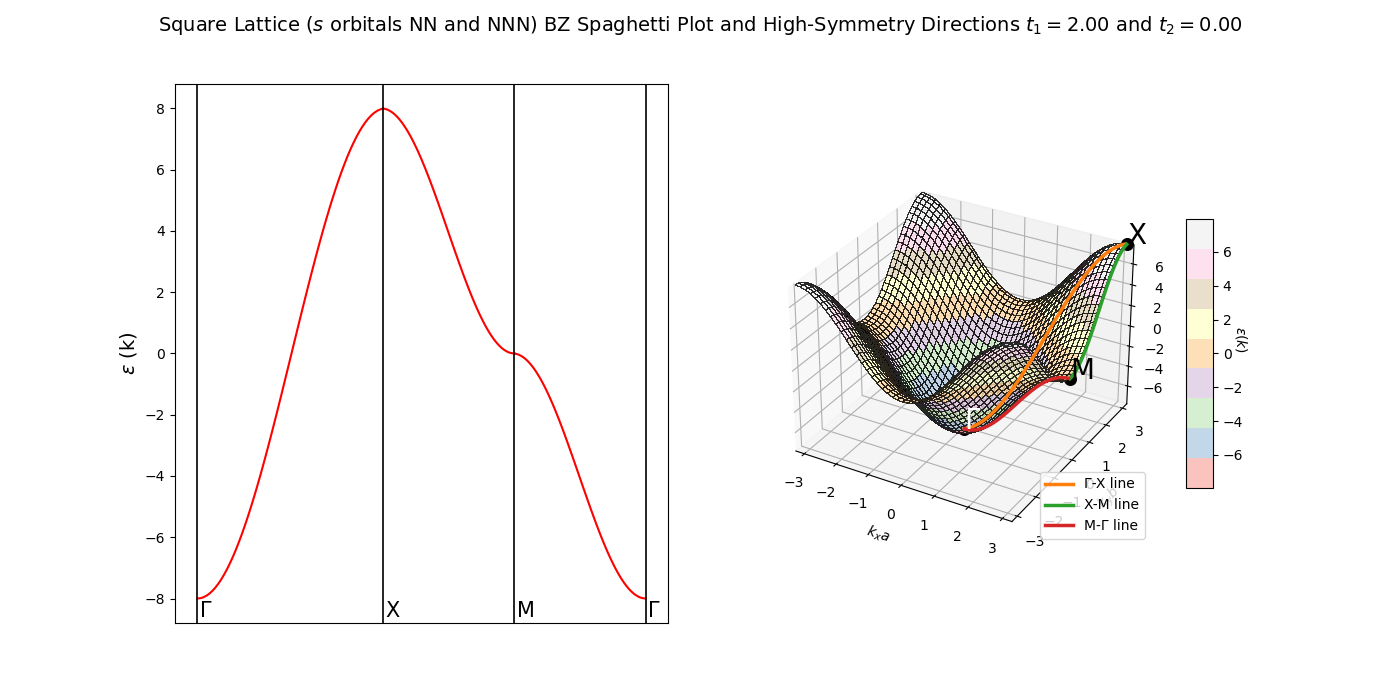

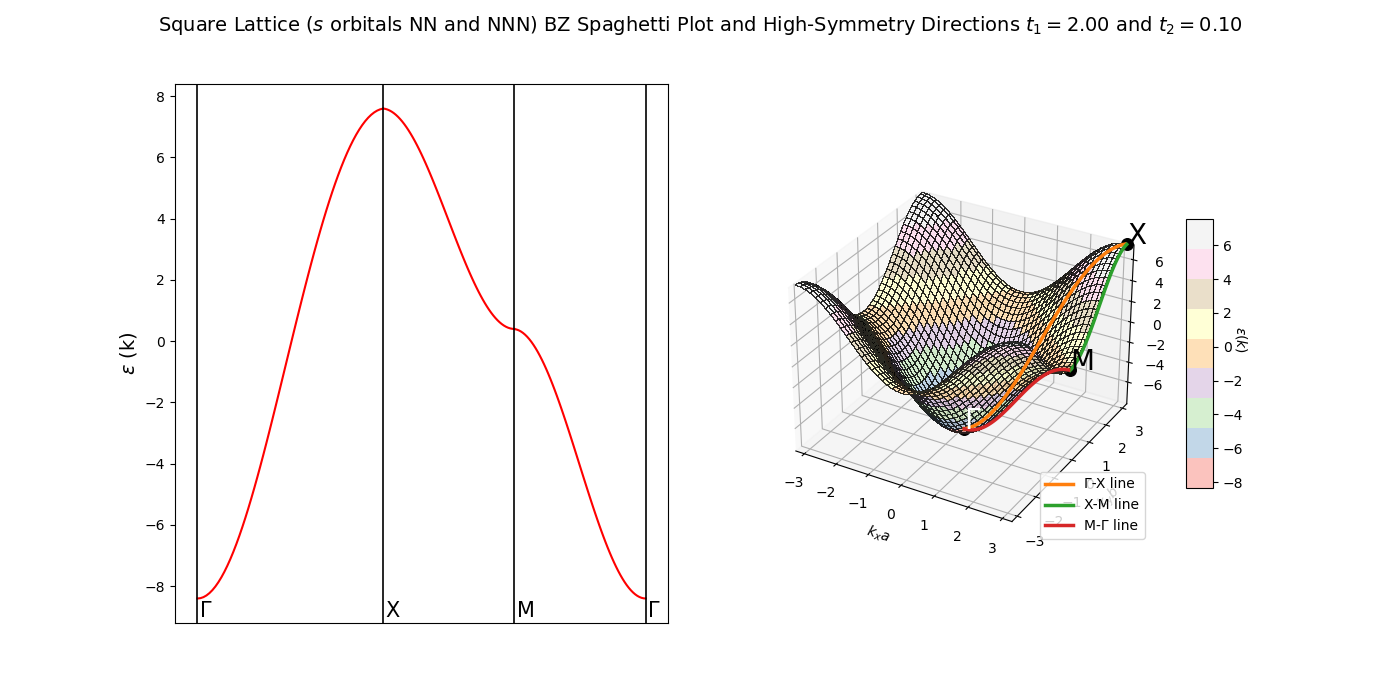

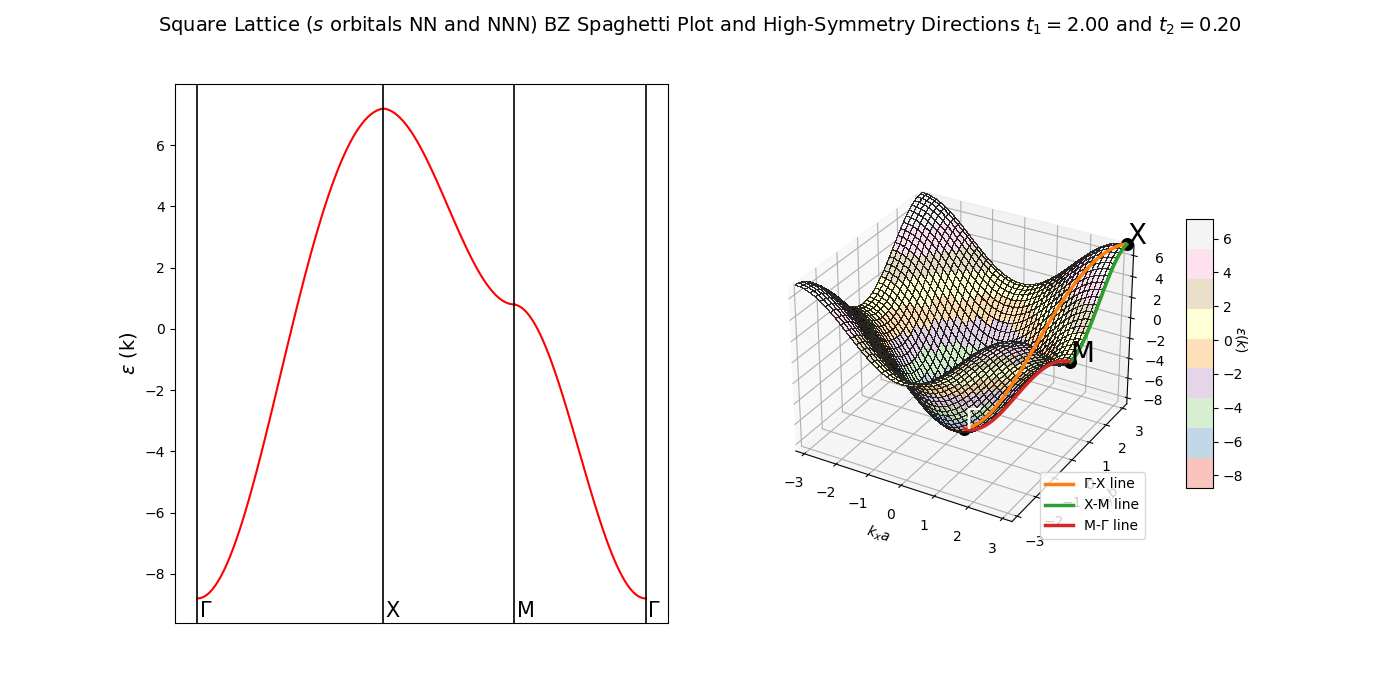

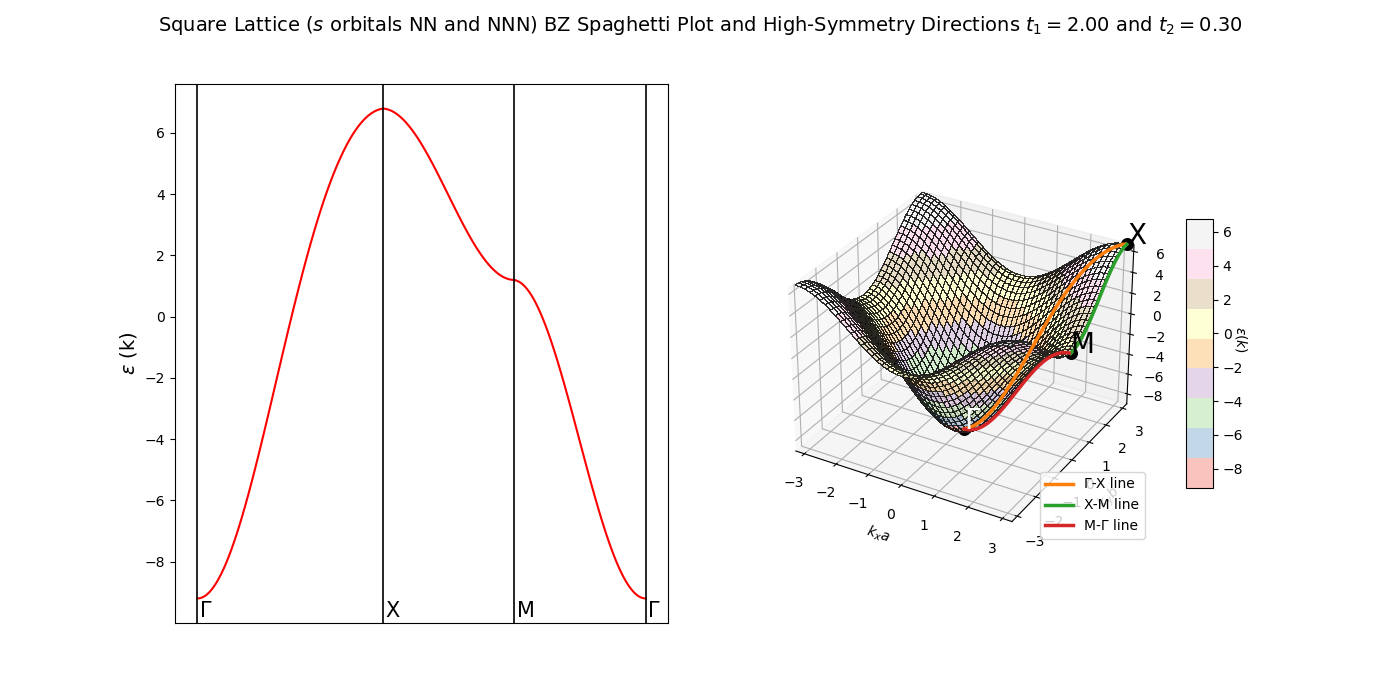

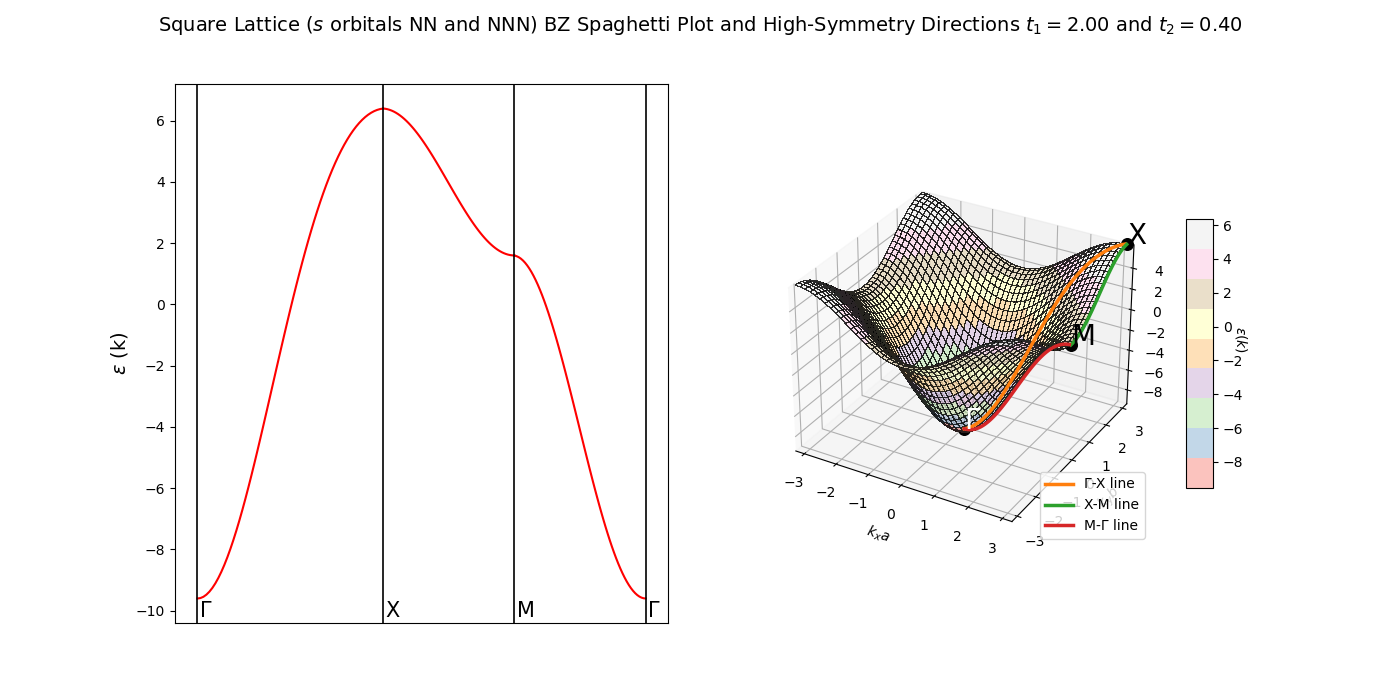

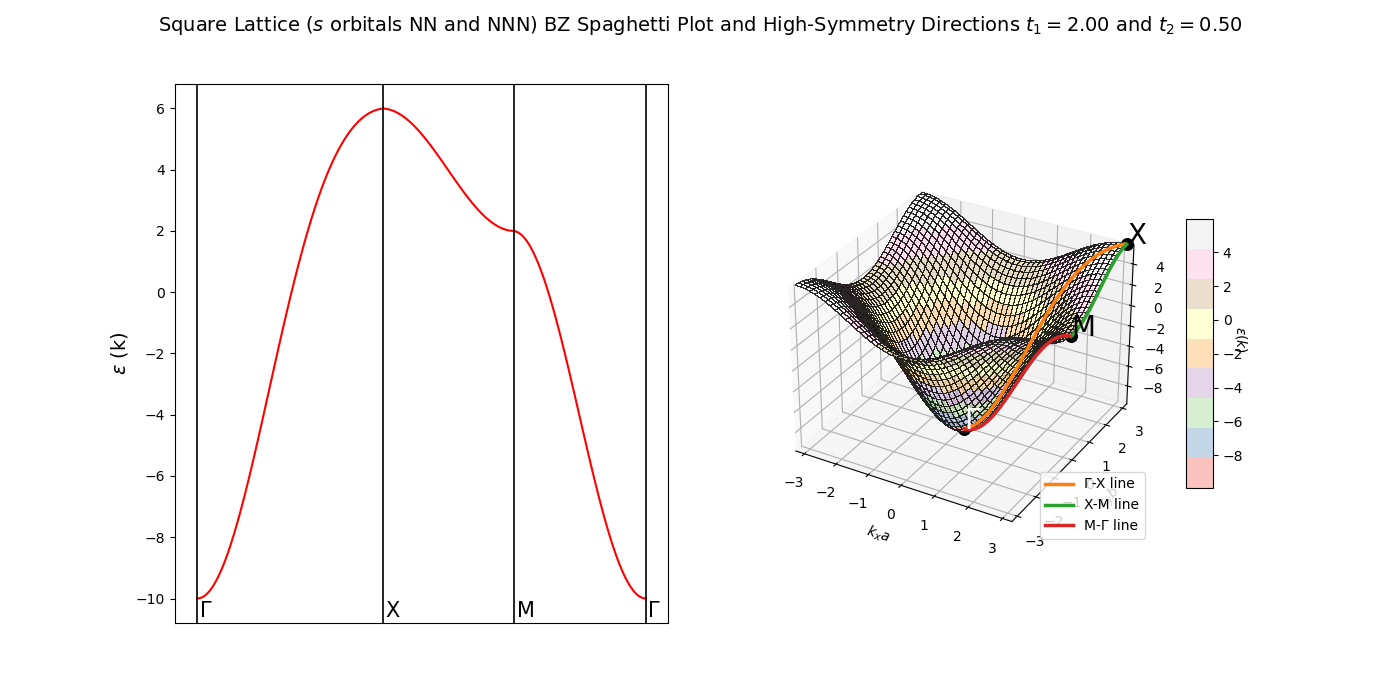

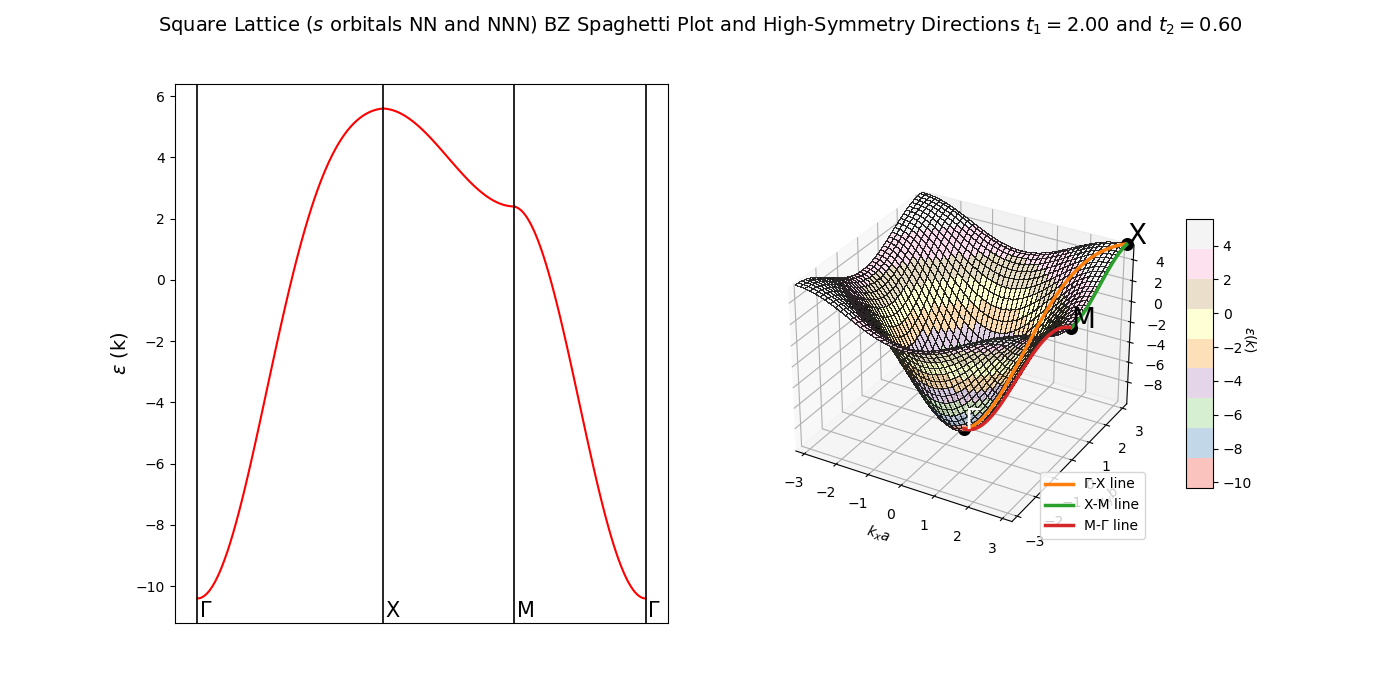

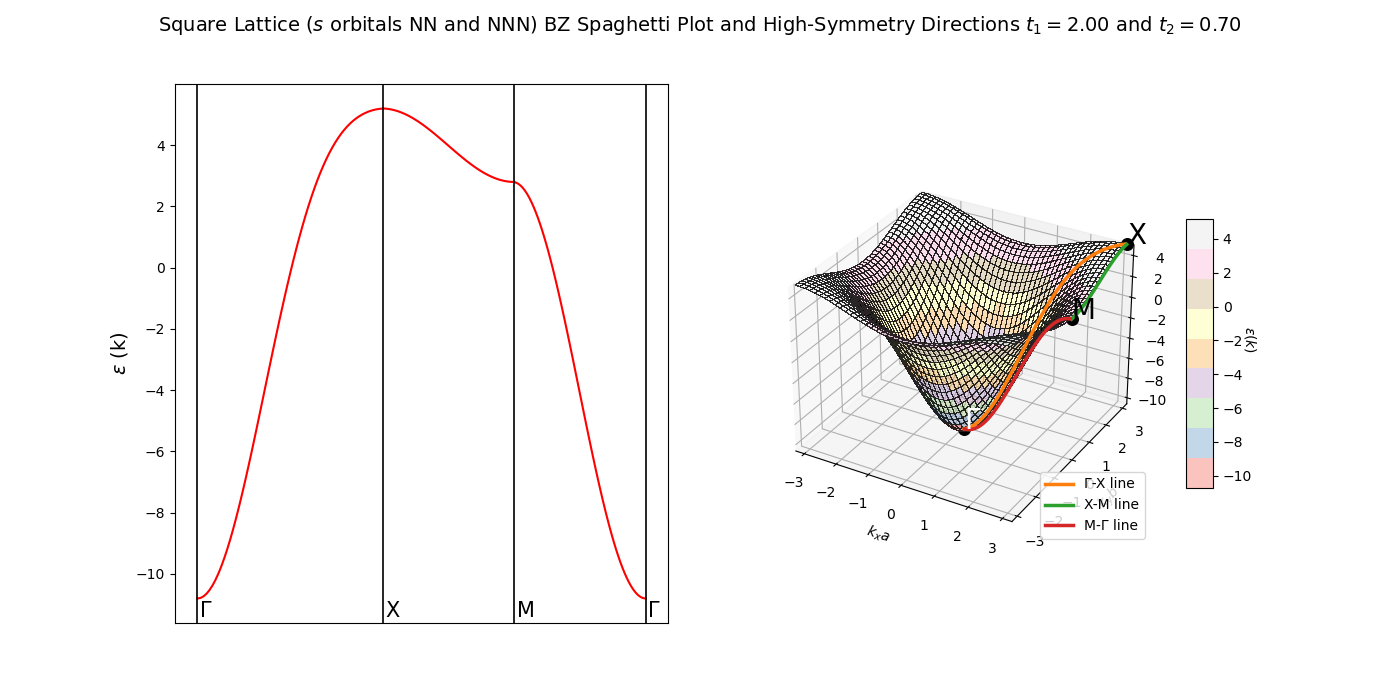

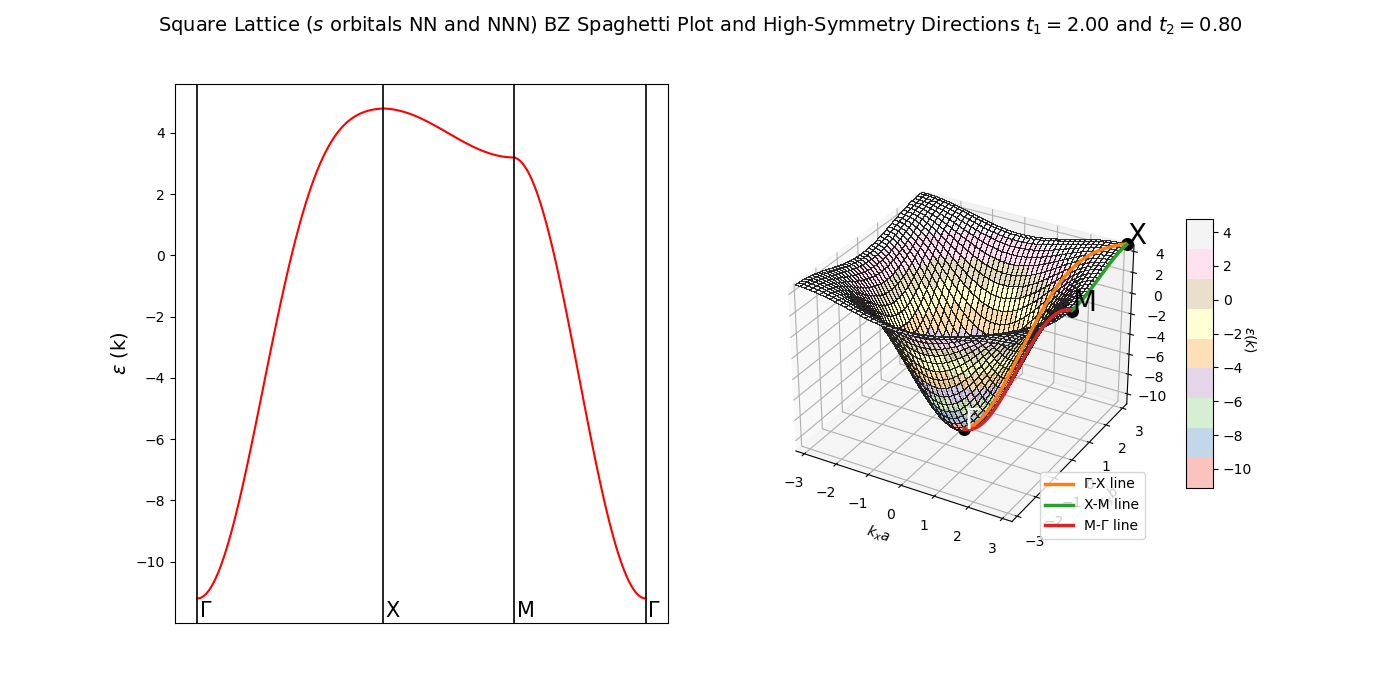

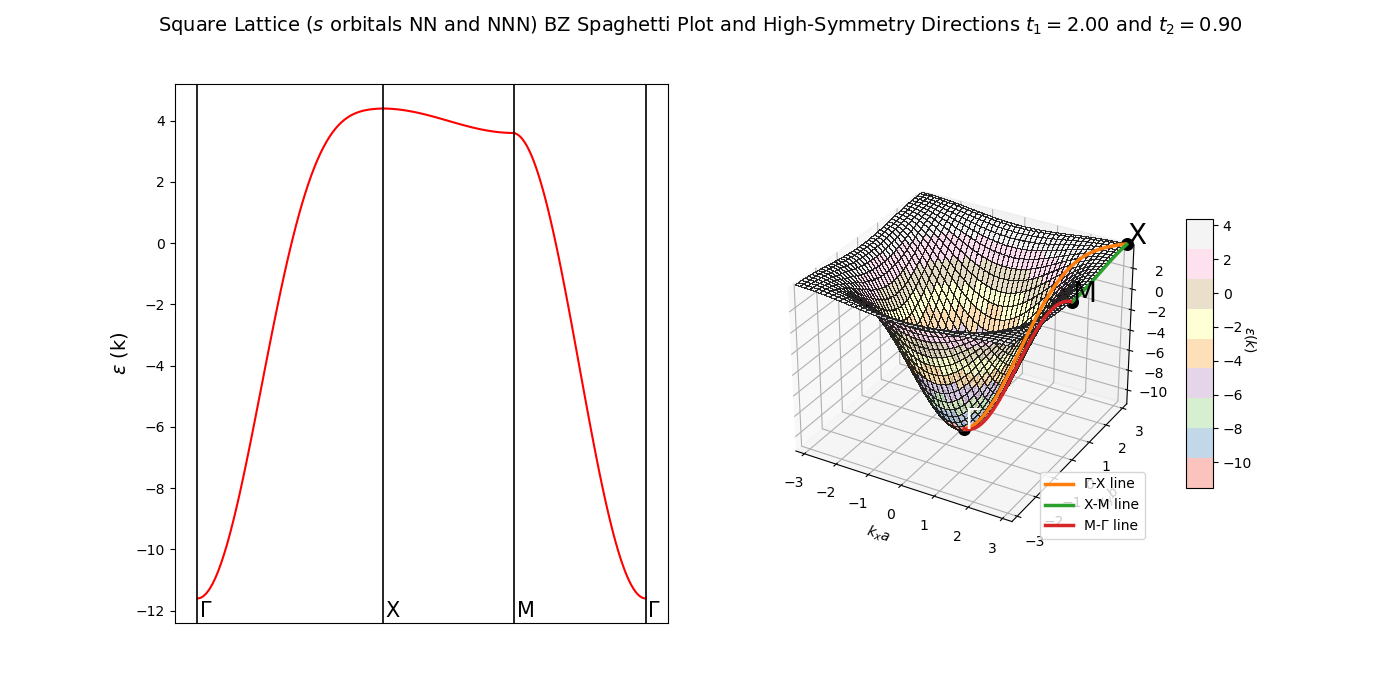

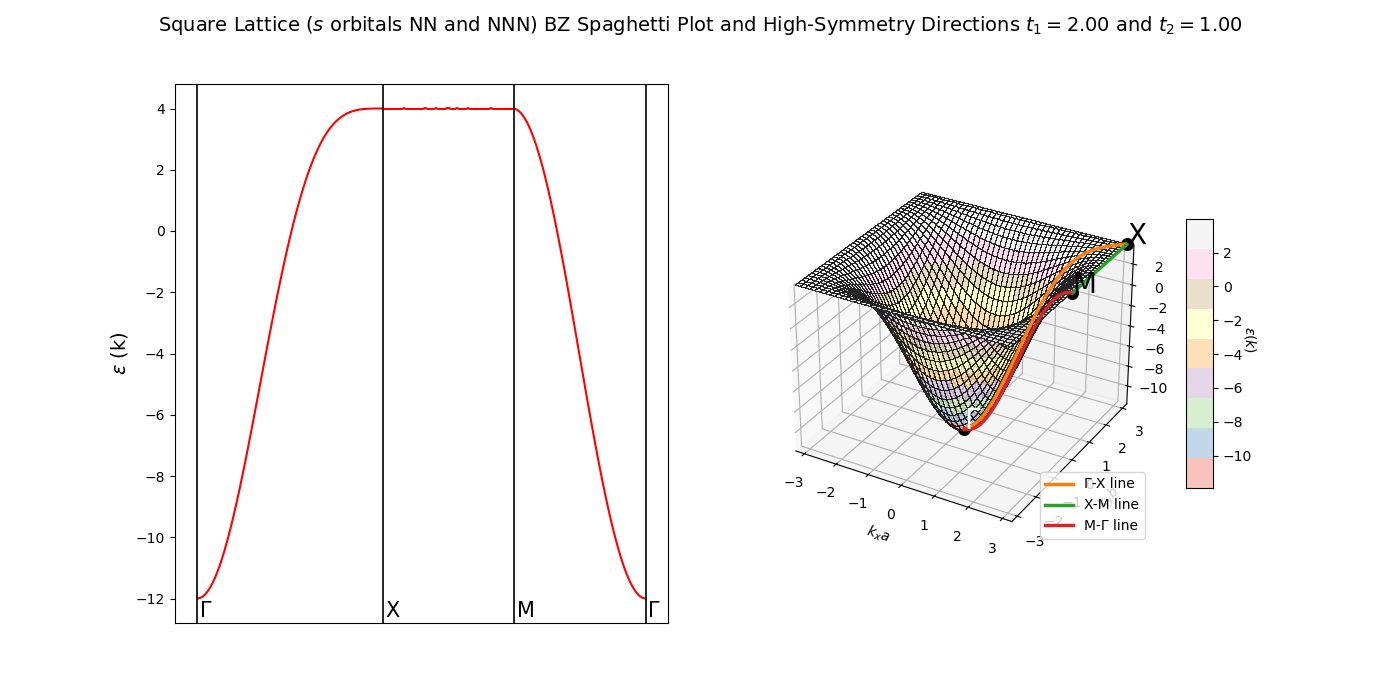

In [58]:
def spagcomb_rep(n,t1,t2max):
    %matplotlib widget
    if n == 1:
        spagcomb(t1,t2max)
    else:
        c = t2max/(n-1)
        for t2 in np.arange(0,t2max+0.1,c):
            E = e_k(X,Y,t1,t2)
        
            # Γ-X line
            Xgx = np.arange(0,np.pi,0.05)
            Ygx = Xgx
            Egx = e_k(Xgx,Ygx,t1,t2)

            # X-M line
            Yxm = np.flip(Xgx)
            Xxm = np.pi*np.ones(len(Yxm))
            Exm = e_k(Xxm,Yxm,t1,t2)

            # M-Γ line
            Xmg = np.flip(Xgx)
            Ymg = np.zeros(len(Xmg))
            Emg = e_k(Xmg,Ymg,t1,t2)

            annotations=["Γ","X","M"]
            an_loc=[[0,0,e_k(0,0,t1,t2),'w'],[np.pi,np.pi,e_k(np.pi,np.pi,t1,t2),'k'],[np.pi,0,e_k(np.pi,0,t1,t2),'k']]
            xvals = Xgx/(np.max(Xgx))

            sp_locs = [0,np.sqrt(2)*xvals[-1],xvals[-1]+np.sqrt(2)*xvals[-1],2*xvals[-1]+np.sqrt(2)*xvals[-1]]
            sp_labels=["Γ","X","M","Γ"]
            sp_labels_locs = [0.15,0.4425,0.647,0.858]

            fig = plt.figure(figsize = (14,7))
            fig.suptitle('Square Lattice ($s$ orbitals NN and NNN) BZ Spaghetti Plot and High-Symmetry Directions $t_1=$'+str("%.2f" % round(float(t1),2))+' and $t_2=$'+str("%.2f" % round(float(t2),2)), fontsize = 14)


            ax = fig.add_subplot(1, 2, 1)

            ax.set_ylabel('$\epsilon$ (k)', fontsize = 14)
            ax.plot(np.sqrt(2)*xvals,Egx, c = 'r')
            ax.plot(xvals+np.sqrt(2)*xvals[-1],Exm, c = 'r')
            ax.plot(xvals+xvals[-1]+np.sqrt(2)*xvals[-1],Emg, c = 'r')

            ax.set_xticks([])
            # ax.set_yticks(fontsize = 13) 
            for p in range(len(sp_locs)):
                ax.axvline(sp_locs[p], ls = '-', lw = 1.2, c='k')
                s = str(sp_labels[p])
                ax.text(sp_locs[p]+0.02, np.min([np.min(Egx),np.min(Exm),np.min(Emg)])-0.6, s, fontsize = 15)

            ax = fig.add_subplot(1, 2, 2, projection='3d')
            surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.Pastel1, alpha=0.8, edgecolor='k', linewidth=0.01, antialiased=False)

            ax.set_zlim(np.min([np.min(Egx),np.min(Exm),np.min(Emg)])+0.5, np.max([np.max(Egx),np.max(Exm),np.max(Emg)])-0.5)
            ax.set_xlim(-np.pi,np.pi)
            ax.set_ylim(-np.pi,np.pi)
            ax.set_xlabel('$k_xa$')
            ax.set_ylabel('$k_yb$')
            ax.plot(Xgx, Ygx, Egx, label='Γ-X line', lw = 2.5, zorder = 9)
            ax.plot(Xxm, Yxm, Exm, label='X-M line', lw = 2.5, zorder = 9)
            ax.plot(Xmg, Ymg, Emg, label='M-Γ line', lw = 2.5, zorder = 9)
            for i, label in enumerate(annotations):
                x = an_loc[i][0]
                y = an_loc[i][1]
                z = an_loc[i][2]
                col = an_loc[i][3]
                ax.scatter(x,y,z, c='k', s = 70, zorder = 10)
                ax.text(x,y,z,label, c=col, fontsize = 20, weight = 550, zorder = 9)
            ax.legend(loc = 'lower right')

            cbar4 = fig.colorbar(surf, shrink=0.5, aspect=10, pad = 0.07)
            cbar4.set_label('$\epsilon (k)$', rotation=270, y = 0.55)

            plt.show()

spagcomb_rep(11,2,1)

As seen above, and as would be expected, changing $t_1$ and $t_2$ changes the shape of the curve and, more importantly, its width. The hopping integrals have a strong dependence on the separation between sites $a$. We reduce or increase $t$ (along some direction) by stretching or compressing the subject lattice respectively (along that direction).

# Question 3
<b> What would be the effect on your hopping integrals of having $p_y$ orbitals rather than s-orbitals? Investigate the influence of this on your electronic structure (you may assume nearest-neighbour hopping only).

## Reasoning

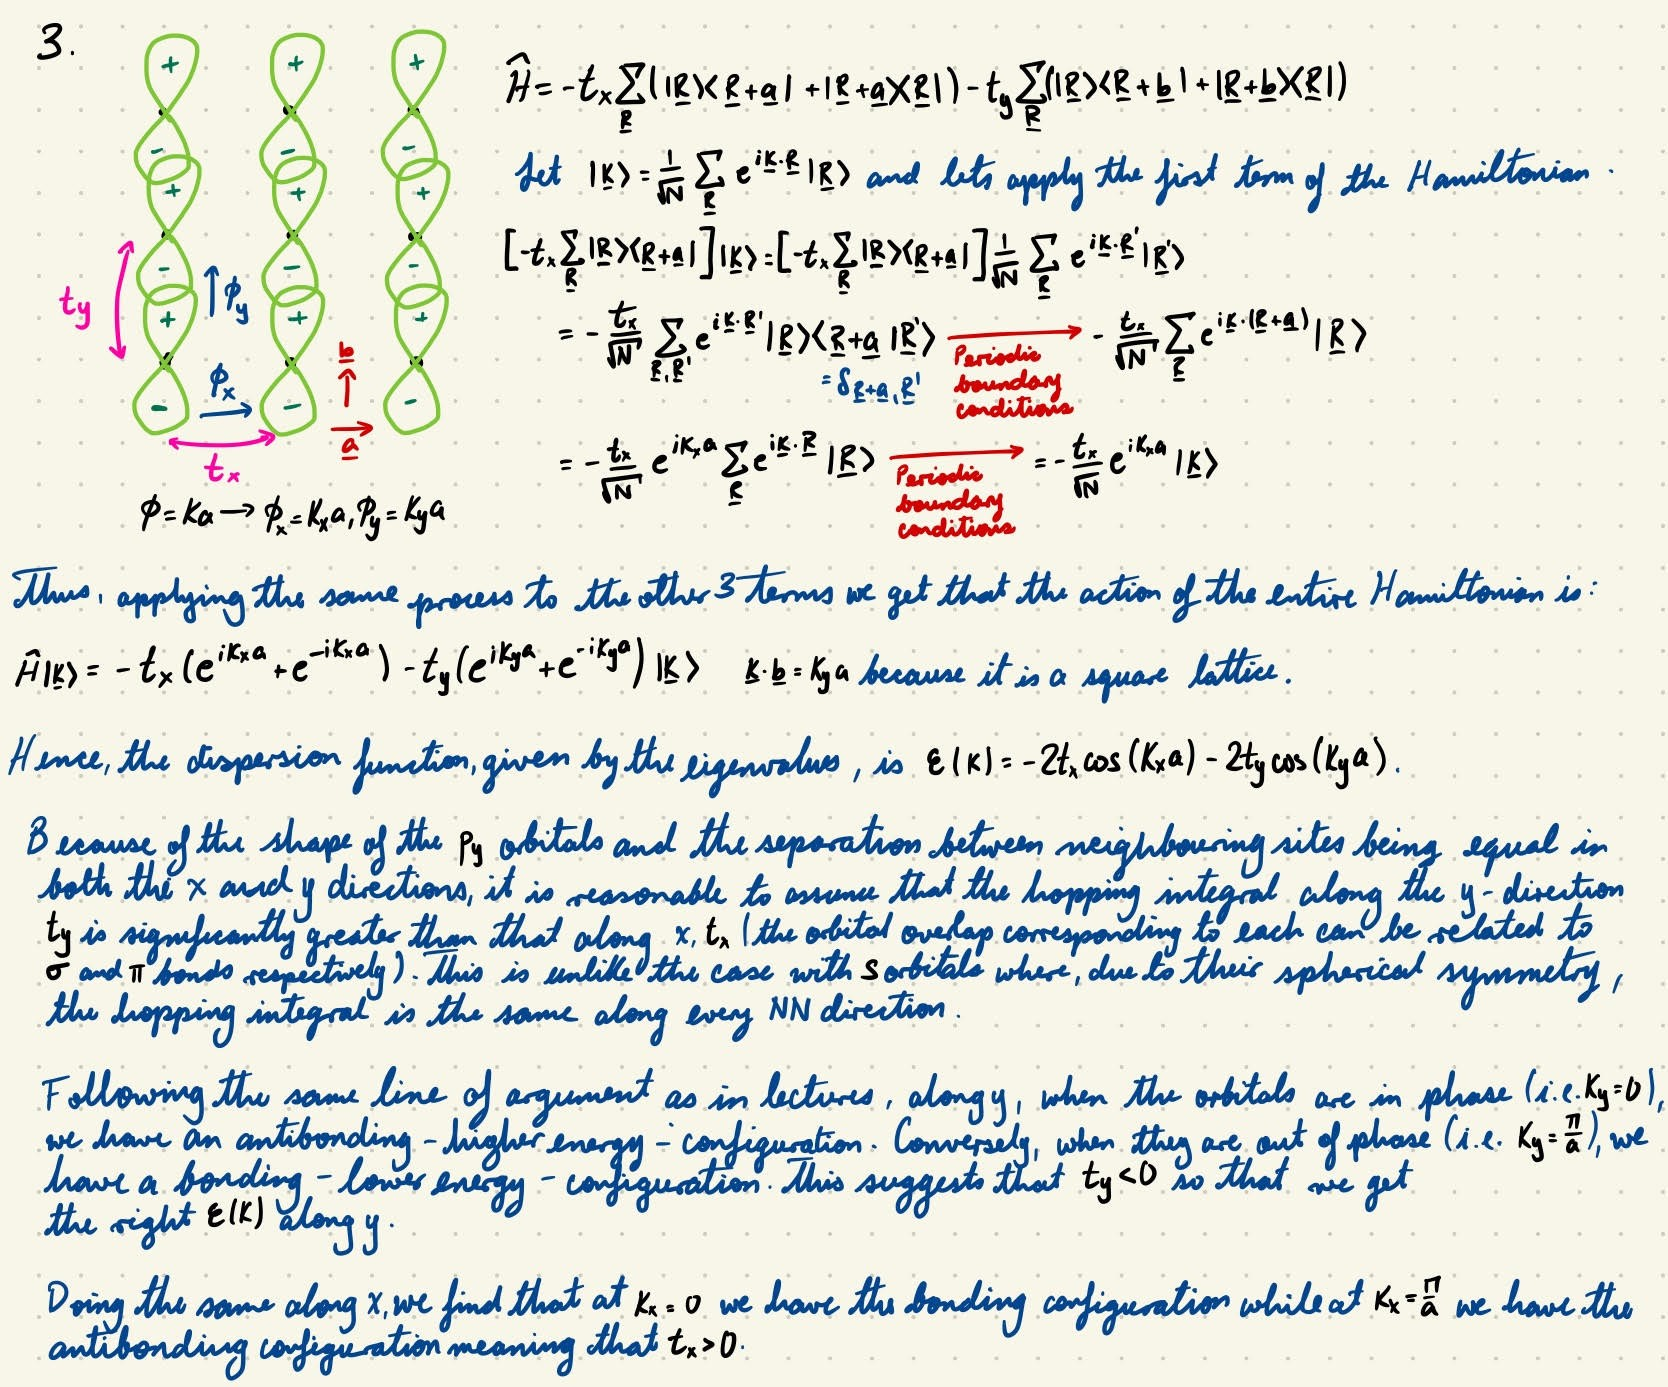

In [12]:
display.Image("Figure_1.jpg", width=800)

## Dispersion relation + square lattice values

In [11]:
def e_kpy(kx_a, ky_a,tx, ty):
    return -2*tx*np.cos(kx_a) - 2*ty*np.cos(ky_a)

## Interactive function 2

In [12]:
def intr2(func):
    %matplotlib inline
    interactive_plot = interactive(func, tx = (0,1,0.1), ty = (-3,-1,0.1))
    output = interactive_plot.children[-1]
    output.layout.height = '600px'
    return interactive_plot

## 3D Dispersion

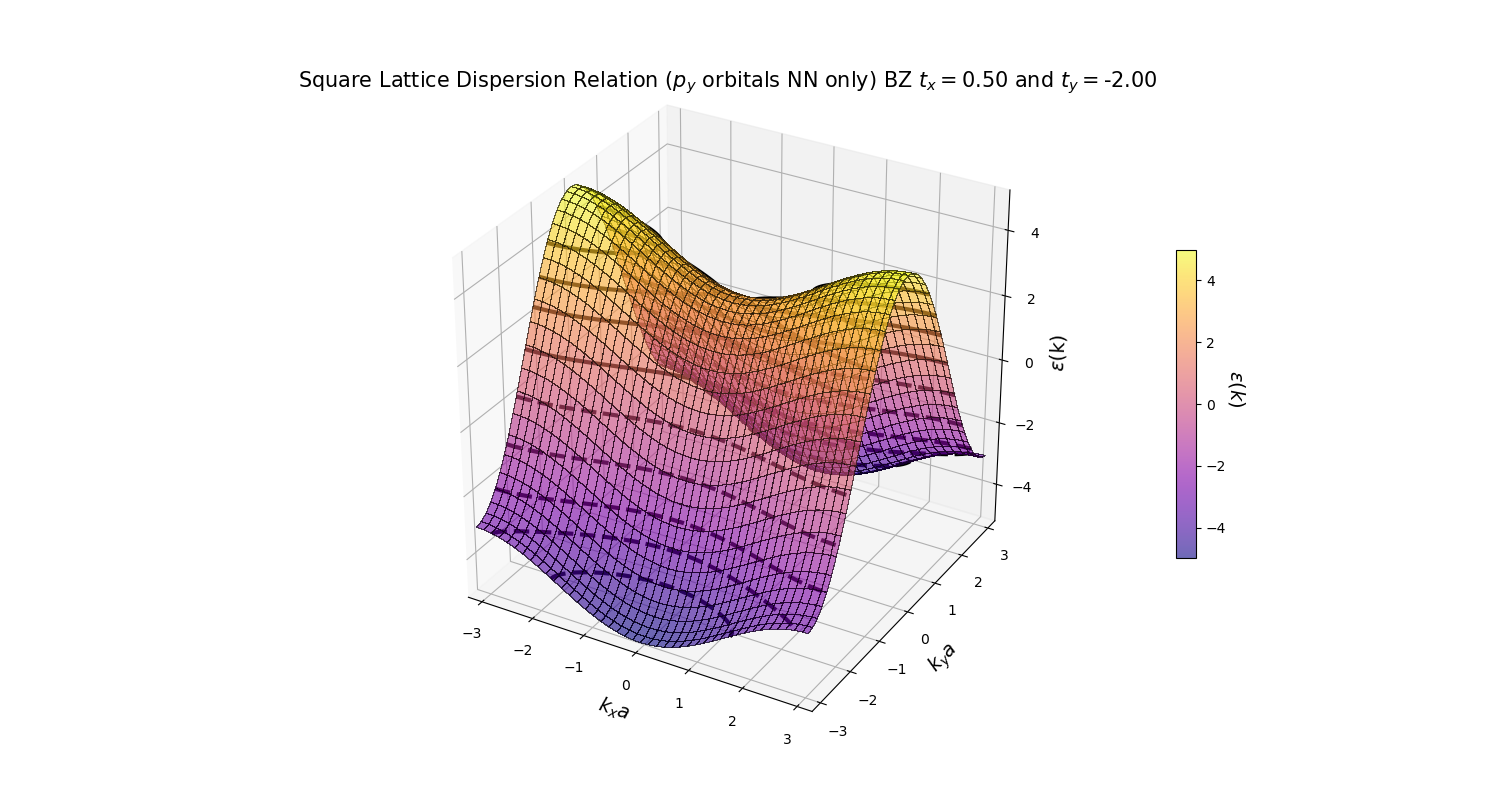

The black contour lines mark the Fermi surface for filling fractions 0.1, 0.2,...,0.8, 0.9.


In [13]:
def drpy3d(tx,ty):
    %matplotlib widget
    E = e_kpy(X,Y,tx,ty)
    
    E1D = []
    for e in E:
        for i in e:
            E1D = np.append(E1D, i)
    E1Ds = sorted(E1D)
    
    levels = []
    for n in range(1,10):
        r = int(n/10*len(E1Ds))
        levels = np.append(levels, E1Ds[r])
    
    fig, ax = plt.subplots(figsize = (15,8), subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.plasma, alpha=0.6, edgecolor='k', linewidth=0.01, antialiased=False, zorder = 0)
    
    cp = ax.contour(X, Y, E, levels, colors='k', linewidths = 3, zorder = 9)
    fmt = {}
    lvl = np.arange(0.1,1,0.1)
    for l, s in zip(cp.levels, lvl):
        fmt[l] = int(s*10)/10
    ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=100, zorder = 80)
    
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-np.pi,np.pi)
    ax.set_title('Square Lattice Dispersion Relation ($p_y$ orbitals NN only) BZ $t_x=$'+str("%.2f" % round(float(tx),2))+' and $t_y=$'+str("%.2f" % round(float(ty),2)), fontsize = 15)
    ax.set_xlabel('$k_x a$', fontsize = 14)
    ax.set_ylabel('$k_y a$', fontsize = 14)
    ax.set_zlabel('$\epsilon$(k)', fontsize = 14)
    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 1.3, 1]))
    cbar = fig.colorbar(surf, shrink=0.5, aspect = 15, pad = 0.12)
    cbar.set_label('$\epsilon (k)$', fontsize = 14, rotation=270, y = 0.55, labelpad = 15) 
    plt.show()
    print('The black contour lines mark the Fermi surface for filling fractions 0.1, 0.2,...,0.8, 0.9.')
drpy3d(0.5,-2)
# intr2(drpy3d)

## 2D Contour

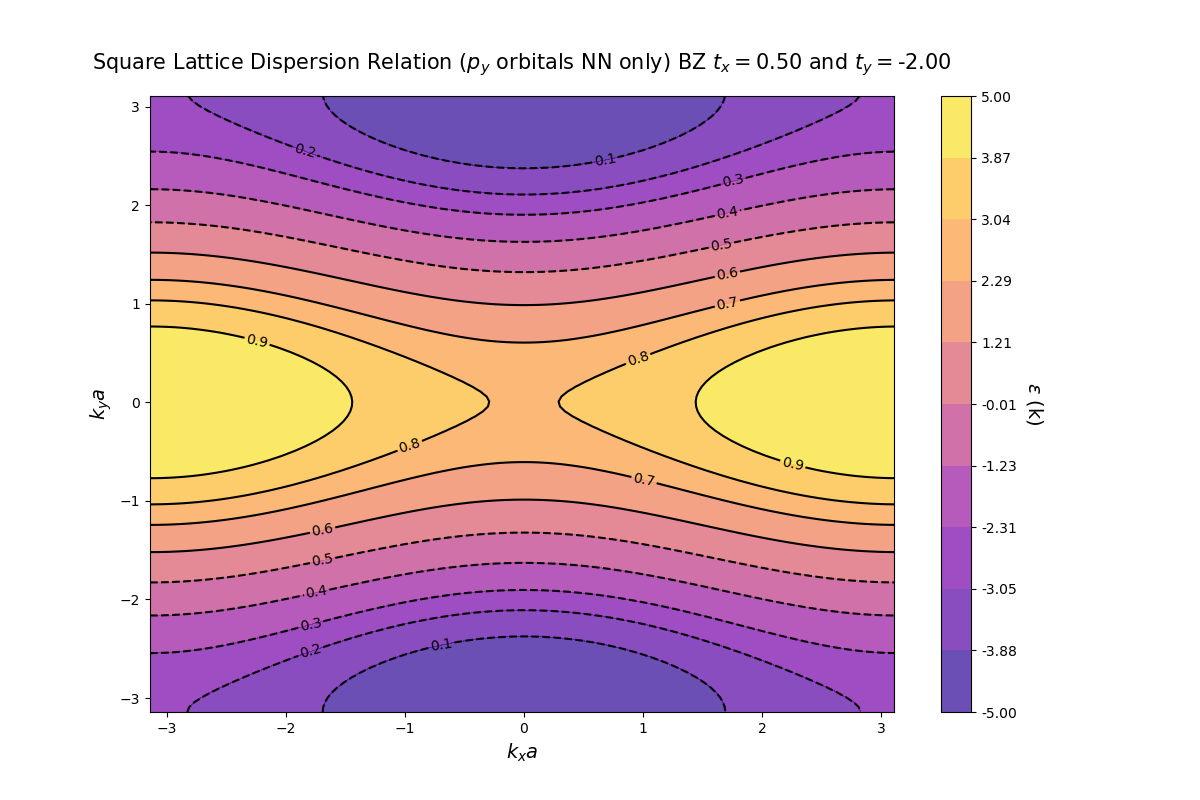

The black contour lines mark the Fermi surface for the labelled filling fractions.


In [63]:
def drpycnt(tx,ty):
    %matplotlib widget
    
    E = e_kpy(X,Y,tx,ty)
    E1D = []
    for e in E:
        for i in e:
            E1D = np.append(E1D, i)
    E1Ds = sorted(E1D)
    
    levels = []
    for n in range(1,10):
        r = int(n/10*len(E1Ds))
        levels = np.append(levels, E1Ds[r])
    
    ticks = []
    for j in range(0,10):
        r = int(j/10*len(E1Ds))
        ticks = np.append(ticks, E1Ds[r])
    ticks = np.append(ticks, E1Ds[-1])
    
    fig,ax=plt.subplots(figsize = (12,8))
    cp1 = ax.contourf(X, Y, E, ticks, cmap=cm.plasma, alpha = 0.7)
    cp = ax.contour(X, Y, E, levels, colors='k')
    # colors='w'
    # cmap = cm.gist_yarg

    fmt = {}
    lvl = np.arange(0.1,1,0.1)
    for l, s in zip(cp.levels, lvl):
        fmt[l] = int(s*10)/10
    ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=10)
     
    cbar2 = fig.colorbar(cp1, ticks =  ticks)
    cbar2.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
    cbar2.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    cbar2.set_label('$\epsilon$ (k)', labelpad = 20, fontsize = 14, rotation=270, y = 0.5)
    ax.set_title('Square Lattice Dispersion Relation ($p_y$ orbitals NN only) BZ $t_x=$'+str("%.2f" % round(float(tx),2))+' and $t_y=$'+str("%.2f" % round(float(ty),2)), fontsize = 15, y = 1.03)
    ax.set_xlabel('$k_x a$', fontsize = 14)
    ax.set_ylabel('$k_y a$', fontsize = 14)
    plt.show()
    print('The black contour lines mark the Fermi surface for the labelled filling fractions.')
drpycnt(0.5,-2)
# intr2(drpycnt)

## High-Symmetry directions

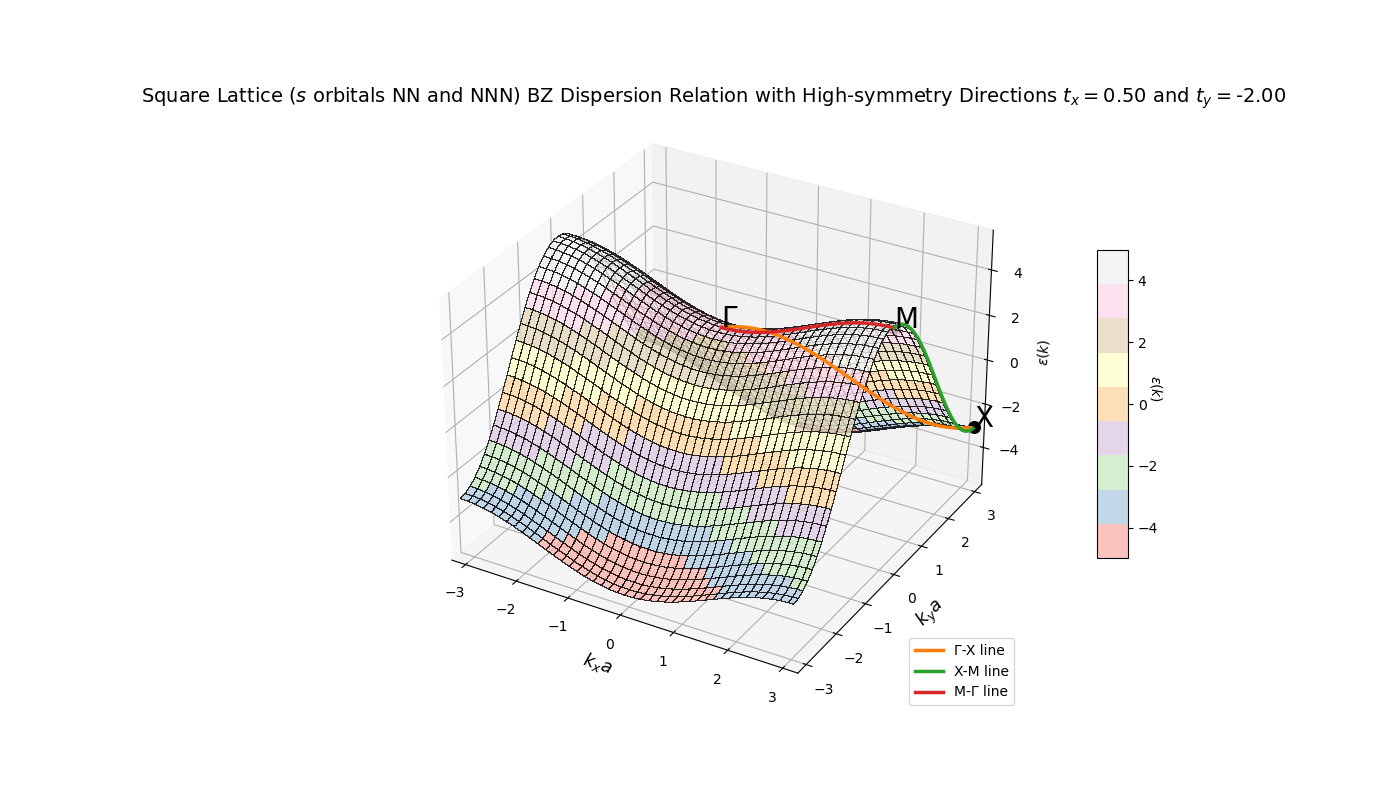

In [61]:
def hsdirpy(tx,ty):
    %matplotlib widget
    E = e_kpy(X,Y,tx,ty)
    
    # Γ-X line
    Xgx = np.arange(0,np.pi,0.1)
    Ygx = Xgx
    Egx = e_kpy(Xgx,Ygx,tx,ty)
    
    # X-M line
    Yxm = np.flip(Xgx)
    Xxm = np.pi*np.ones(len(Yxm))
    Exm = e_kpy(Xxm,Yxm,tx,ty)
    
    # M-Γ line
    Xmg = np.flip(Xgx)
    Ymg = np.zeros(len(Xmg))
    Emg = e_kpy(Xmg,Ymg,tx,ty)
    
    annotations=["Γ","X","M"]
    an_loc=[[0,0,e_kpy(0,0,tx,ty)],[np.pi,np.pi,e_kpy(np.pi,np.pi,tx,ty)],[np.pi,0,e_kpy(np.pi,0,tx,ty)]]

    fig, ax = plt.subplots(figsize = (14,8), subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.Pastel1, alpha=0.8, edgecolor='k', linewidth=0.01, antialiased=False)

    # ax.set_zlim(-5, 5)
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-np.pi,np.pi)
    ax.set_title('Square Lattice ($s$ orbitals NN and NNN) BZ Dispersion Relation with High-symmetry Directions $t_x=$'+str("%.2f" % round(float(tx),2))+' and $t_y=$'+str("%.2f" % round(float(ty),2)), fontsize = 14, y = 1.06)
    ax.set_zlabel('$\epsilon (k)$')
    ax.set_xlabel('$k_x a$', fontsize = 13)
    ax.set_ylabel('$k_y a$', fontsize = 13)
    ax.plot(Xgx, Ygx, Egx, label='Γ-X line', lw = 2.5, zorder = 9)
    ax.plot(Xxm, Yxm, Exm, label='X-M line', lw = 2.5, zorder = 9)
    ax.plot(Xmg, Ymg, Emg, label='M-Γ line', lw = 2.5, zorder = 9)
    for i, label in enumerate(annotations):
        x = an_loc[i][0]
        y = an_loc[i][1]
        z = an_loc[i][2]
        ax.scatter(x,y,z, c='k', s = 70, zorder = 10)
        ax.text(x,y,z,label, c='k', fontsize = 20, weight = 500, zorder = 9)
    ax.legend(loc = 'lower right')

    cbar4 = fig.colorbar(surf, shrink=0.5, aspect=10, pad = 0.07)
    cbar4.set_label('$\epsilon (k)$', rotation=270, y = 0.55)

    plt.show()
hsdirpy(0.5,-2)
# intr2(hsdirpy)

## Spaghetti plot

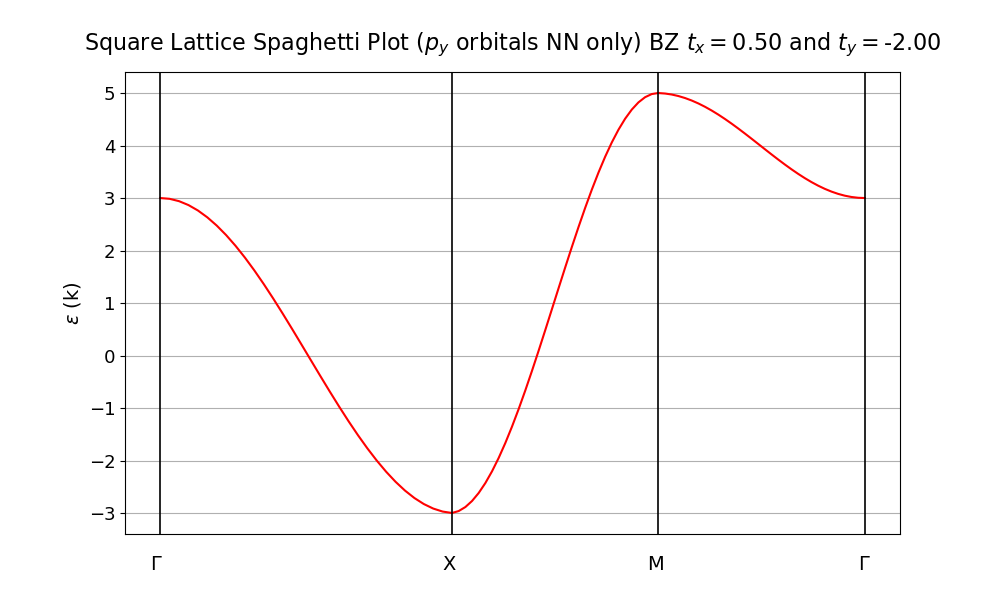

In [62]:
def spaghetti_plot_py(tx,ty):
    %matplotlib widget
    # Γ-X line
    Xgx = np.arange(0,np.pi,0.1)
    Ygx = Xgx
    Egx = e_kpy(Xgx,Ygx,tx,ty)
    
    # X-M line
    Yxm = np.flip(Xgx)
    Xxm = np.pi*np.ones(len(Yxm))
    Exm = e_kpy(Xxm,Yxm,tx,ty)
    
    # M-Γ line
    Xmg = np.flip(Xgx)
    Ymg = np.zeros(len(Xmg))
    Emg = e_kpy(Xmg,Ymg,tx,ty)
    
    xvals = Xgx/(np.max(Xgx))
    
    # k locations of high-symmetry points
    
    # sp_locs = [0, Xgx[-1], 2*Xgx[-1], 3*Xgx[-1]]
    sp_locs = [0,np.sqrt(2)*xvals[-1],xvals[-1]+np.sqrt(2)*xvals[-1],2*xvals[-1]+np.sqrt(2)*xvals[-1]]
    sp_labels=["Γ","X","M","Γ"]
    # sp_labels_locs = [0.15,0.385,0.62,0.855]
    sp_labels_locs = [0.15,0.4425,0.647,0.858]
    
    plt.figure(figsize = (10,6))
    plt.title('Square Lattice Spaghetti Plot ($p_y$ orbitals NN only) BZ $t_x=$'+str("%.2f" % round(float(tx),2))+' and $t_y=$'+str("%.2f" % round(float(ty),2)), fontsize = 16, y = 1.03)
    # plt.xlabel('$k a$', fontsize = 14)
    plt.ylabel('$\epsilon$ (k)', fontsize = 14)
    plt.plot(np.sqrt(2)*xvals,Egx, c = 'r')
    plt.plot(xvals+np.sqrt(2)*xvals[-1],Exm, c = 'r')
    plt.plot(xvals+xvals[-1]+np.sqrt(2)*xvals[-1],Emg, c = 'r')
    
    # plt.plot(Xgx, Egx, c = 'r')
    # plt.plot(Xgx + Xgx[-1], Exm, c = 'r')
    # plt.plot(Xgx + 2*Xgx[-1],Emg, c = 'r')
    
    plt.xticks([])
    # plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13) 
    for p in range(len(sp_locs)):
        plt.axvline(sp_locs[p], ls = '-', lw = 1.2, c='k')
        s = str(sp_labels[p])
        plt.gcf().text(sp_labels_locs[p], 0.05, s, fontsize=14)
        # plt.text(sym_points[p]+0.1, np.min([np.min(Egx),np.min(Exm),np.min(Emg)])-1, s, fontsize = 15)
    plt.grid()
    plt.show()
spaghetti_plot_py(0.5,-2)
# intr2(spaghetti_plot_py)

## Combined (x4)

In [17]:
def drpycomb4(tx,ty):
    %matplotlib widget
    
    E = e_kpy(X,Y,tx,ty)
    E1D = []
    for e in E:
        for i in e:
            E1D = np.append(E1D, i)
    E1Ds = sorted(E1D)
    levels = []
    for n in range(1,10):
        r = int(n/10*len(E1Ds))
        levels = np.append(levels, E1Ds[r])
    ticks = []
    for j in range(0,10):
        r = int(j/10*len(E1Ds))
        ticks = np.append(ticks, E1Ds[r])
    ticks = np.append(ticks, E1Ds[-1])

    fig = plt.figure(figsize = (14,10))
    fig.suptitle('Square Lattice ($p_y$ orbitals NN only) BZ $t_x=$'+str("%.2f" % round(float(tx),2))+' and $t_y=$'+str("%.2f" % round(float(ty),2)), fontsize = 15)
    
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    
    surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.plasma, alpha=0.6, edgecolor='k', linewidth=0.01, antialiased=False, zorder = 0)
    cp = ax.contour(X, Y, E, levels, colors='k', linewidths = 3, zorder = 9)
    fmt = {}
    lvl = np.arange(0.1,1,0.1)
    for l, s in zip(cp.levels, lvl):
        fmt[l] = int(s*10)/10
    ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=100, zorder = 80)
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-np.pi,np.pi)
    ax.set_xlabel('$k_x a$', fontsize = 13)
    ax.set_ylabel('$k_y a$', fontsize = 13)
    ax.set_zticks(np.arange(int(np.min(E))-1,int(np.max(E))+1,2))
       
    ax = fig.add_subplot(2, 2, 2)
    
    cp1 = ax.contourf(X, Y, E, ticks, cmap=cm.plasma, alpha = 0.8)
    cp = ax.contour(X, Y, E, levels, colors='k')
    fmt = {}
    lvl = np.arange(0.1,1,0.1)
    for l, s in zip(cp.levels, lvl):
        fmt[l] = int(s*10)/10
    ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=10)
    cbar2 = fig.colorbar(cp1, ticks =  ticks)
    cbar2.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
    cbar2.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    cbar2.set_label('$\epsilon$ (k)', labelpad = 20, fontsize = 13, rotation=270, y = 0.5)
    ax.set_xlabel('$k_x a$', fontsize = 13)
    ax.set_ylabel('$k_y a$', fontsize = 13)
    
     # Γ-X line
    Xgx = np.arange(0,np.pi,0.1)
    Ygx = Xgx
    Egx = e_kpy(Xgx,Ygx,tx,ty)
    
    # X-M line
    Yxm = np.flip(Xgx)
    Xxm = np.pi*np.ones(len(Yxm))
    Exm = e_kpy(Xxm,Yxm,tx,ty)
    
    # M-Γ line
    Xmg = np.flip(Xgx)
    Ymg = np.zeros(len(Xmg))
    Emg = e_kpy(Xmg,Ymg,tx,ty)
    
    annotations=["Γ","X","M"]
    an_loc=[[0,0,e_kpy(0,0,tx,ty)],[np.pi,np.pi,e_kpy(np.pi,np.pi,tx,ty)],[np.pi,0,e_kpy(np.pi,0,tx,ty)]]
    xvals = Xgx/(np.max(Xgx))
    
    sp_locs = [0,np.sqrt(2)*xvals[-1],xvals[-1]+np.sqrt(2)*xvals[-1],2*xvals[-1]+np.sqrt(2)*xvals[-1]]
    sp_labels=["Γ","X","M","Γ"]
    sp_labels_locs = [0.15,0.4425,0.647,0.858]
        
    ax = fig.add_subplot(2, 2, 3)
    
    ax.set_ylabel('$\epsilon$ (k)', fontsize = 14)
    ax.plot(np.sqrt(2)*xvals,Egx, c = 'r')
    ax.plot(xvals+np.sqrt(2)*xvals[-1],Exm, c = 'r')
    ax.plot(xvals+xvals[-1]+np.sqrt(2)*xvals[-1],Emg, c = 'r')
    
    ax.set_xticks([])
    # ax.set_yticks(fontsize = 13) 
    for p in range(len(sp_locs)):
        ax.axvline(sp_locs[p], ls = '-', lw = 1.2, c='k')
        s = str(sp_labels[p])
        ax.text(sp_locs[p]+0.02, np.min([np.min(Egx),np.min(Exm),np.min(Emg)])-1, s, fontsize = 15)
    
    
    ax = fig.add_subplot(2, 2, 4, projection='3d')
    surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.Pastel1, alpha=0.8, edgecolor='k', linewidth=0.01, antialiased=False)

    # ax.set_zlim(-5, 5)
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-np.pi,np.pi)
    ax.set_xlabel('$k_x a$', fontsize = 13)
    ax.set_ylabel('$k_y a$', fontsize = 13)
    ax.plot(Xgx, Ygx, Egx, label='Γ-X line', lw = 2.5, zorder = 9)
    ax.plot(Xxm, Yxm, Exm, label='X-M line', lw = 2.5, zorder = 9)
    ax.plot(Xmg, Ymg, Emg, label='M-Γ line', lw = 2.5, zorder = 9)
    for i, label in enumerate(annotations):
        x = an_loc[i][0]
        y = an_loc[i][1]
        z = an_loc[i][2]
        ax.scatter(x,y,z, c='k', s = 70, zorder = 10)
        ax.text(x,y,z,label, c='k', fontsize = 15, weight = 500, zorder = 9)
    ax.legend(loc = 'lower right')

    cbar4 = fig.colorbar(surf, shrink=0.5, aspect=10, pad = 0.07)
    cbar4.set_label('$\epsilon (k)$', rotation=270, y = 0.55)
    
    plt.show()
    print('The black contour lines mark the Fermi surface for filling fractions 0.1, 0.2,...,0.8, 0.9.')    
# drpycomb4(0.5,-2)
# intr2(drpycomb4)

## Combined (x4) rep

In [18]:
def drpycomb4_rep(n,txmax,ty):
    %matplotlib widget
    if n == 1:
        drpycomb4(txmax,ty)
    else:
        c = txmax/(n-1)
        for tx in np.arange(0,txmax+0.1,c):
            E = e_kpy(X,Y,tx,ty)
            E1D = []
            for e in E:
                for i in e:
                    E1D = np.append(E1D, i)
            E1Ds = sorted(E1D)
            levels = []
            for n in range(1,10):
                r = int(n/10*len(E1Ds))
                levels = np.append(levels, E1Ds[r])
            ticks = []
            for j in range(0,10):
                r = int(j/10*len(E1Ds))
                ticks = np.append(ticks, E1Ds[r])
            ticks = np.append(ticks, E1Ds[-1])

            fig = plt.figure(figsize = (14,10))
            fig.suptitle('Square Lattice Dispersion Relation ($p_y$ orbitals NN only) BZ $t_x=$'+str("%.2f" % round(float(tx),2))+' and $t_y=$'+str("%.2f" % round(float(ty),2)), fontsize = 15)

            ax = fig.add_subplot(2, 2, 1, projection='3d')

            surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.plasma, alpha=0.6, edgecolor='k', linewidth=0.01, antialiased=False, zorder = 0)
            cp = ax.contour(X, Y, E, levels, colors='k', linewidths = 3, zorder = 9)
            fmt = {}
            lvl = np.arange(0.1,1,0.1)
            for l, s in zip(cp.levels, lvl):
                fmt[l] = int(s*10)/10
            ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=100, zorder = 80)
            ax.set_xlim(-np.pi,np.pi)
            ax.set_ylim(-np.pi,np.pi)
            ax.set_xlabel('$k_x a$', fontsize = 13)
            ax.set_ylabel('$k_y a$', fontsize = 13)
            ax.set_zticks(np.arange(int(np.min(E))-1,int(np.max(E))+1,2))

            ax = fig.add_subplot(2, 2, 2)

            cp1 = ax.contourf(X, Y, E, ticks, cmap=cm.plasma, alpha = 0.8)
            cp = ax.contour(X, Y, E, levels, colors='k')
            fmt = {}
            lvl = np.arange(0.1,1,0.1)
            for l, s in zip(cp.levels, lvl):
                fmt[l] = int(s*10)/10
            ax.clabel(cp, cp.levels, inline=True, fmt=fmt, fontsize=10)
            cbar2 = fig.colorbar(cp1, ticks =  ticks)
            cbar2.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
            cbar2.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
            cbar2.set_label('$\epsilon$ (k)', labelpad = 20, fontsize = 13, rotation=270, y = 0.5)
            ax.set_xlabel('$k_x a$', fontsize = 13)
            ax.set_ylabel('$k_y a$', fontsize = 13)

             # Γ-X line
            Xgx = np.arange(0,np.pi,0.1)
            Ygx = Xgx
            Egx = e_kpy(Xgx,Ygx,tx,ty)

            # X-M line
            Yxm = np.flip(Xgx)
            Xxm = np.pi*np.ones(len(Yxm))
            Exm = e_kpy(Xxm,Yxm,tx,ty)

            # M-Γ line
            Xmg = np.flip(Xgx)
            Ymg = np.zeros(len(Xmg))
            Emg = e_kpy(Xmg,Ymg,tx,ty)

            annotations=["Γ","X","M"]
            an_loc=[[0,0,e_kpy(0,0,tx,ty)],[np.pi,np.pi,e_kpy(np.pi,np.pi,tx,ty)],[np.pi,0,e_kpy(np.pi,0,tx,ty)]]
            xvals = Xgx/(np.max(Xgx))

            sp_locs = [0,np.sqrt(2)*xvals[-1],xvals[-1]+np.sqrt(2)*xvals[-1],2*xvals[-1]+np.sqrt(2)*xvals[-1]]
            sp_labels=["Γ","X","M","Γ"]
            
            ax = fig.add_subplot(2, 2, 3)

            ax.set_ylabel('$\epsilon$ (k)', fontsize = 14)
            ax.plot(np.sqrt(2)*xvals,Egx, c = 'r')
            ax.plot(xvals+np.sqrt(2)*xvals[-1],Exm, c = 'r')
            ax.plot(xvals+xvals[-1]+np.sqrt(2)*xvals[-1],Emg, c = 'r')

            ax.set_xticks([])
            # ax.set_yticks(fontsize = 13) 
            for p in range(len(sp_locs)):
                ax.axvline(sp_locs[p], ls = '-', lw = 1.2, c='k')
                s = str(sp_labels[p])
                ax.text(sp_locs[p]+0.02, np.min([np.min(Egx),np.min(Exm),np.min(Emg)])-1, s, fontsize = 15)


            ax = fig.add_subplot(2, 2, 4, projection='3d')
            surf = ax.plot_surface(X, Y, E, rstride = 3, cstride = 3, cmap=cm.Pastel1, alpha=0.8, edgecolor='k', linewidth=0.01, antialiased=False)

            # ax.set_zlim(-5, 5)
            ax.set_xlim(-np.pi,np.pi)
            ax.set_ylim(-np.pi,np.pi)
            ax.set_xlabel('$k_x a$', fontsize = 13)
            ax.set_ylabel('$k_y a$', fontsize = 13)
            ax.plot(Xgx, Ygx, Egx, label='Γ-X line', lw = 2.5, zorder = 9)
            ax.plot(Xxm, Yxm, Exm, label='X-M line', lw = 2.5, zorder = 9)
            ax.plot(Xmg, Ymg, Emg, label='M-Γ line', lw = 2.5, zorder = 9)
            for i, label in enumerate(annotations):
                x = an_loc[i][0]
                y = an_loc[i][1]
                z = an_loc[i][2]
                ax.scatter(x,y,z, c='k', s = 70, zorder = 10)
                ax.text(x,y,z,label, c='k', fontsize = 15, weight = 500, zorder = 9)
            ax.legend(loc = 'lower right')

            cbar4 = fig.colorbar(surf, shrink=0.5, aspect=10, pad = 0.07)
            cbar4.set_label('$\epsilon (k)$', rotation=270, y = 0.55)

            plt.show()
        print('The black contour lines mark the Fermi surface for filling fractions 0.1, 0.2,...,0.8, 0.9.')    
drpycomb4_rep(11,1,-2)

NameError: name 'e_kpy' is not defined

As before, executing intr2(func) will allow to vary $t_x$ and $t_y$ in real time. While we have a fixed negative $t_y$, $t_x$ varies from 0 to a positive value of magnitude smaller than that of $t_y$ to portray the difference in the overlap between the $p_y$ bonds along the $x$ and $y$ directions and its consequence on the hopping.

It is worth noting the difference between the $p_y$ orbitals NN only case and the $s$ orbitals NN and NNN case, in particular that the for does not have 4-fold symmetry unlike the latter, a direct consequence in the change in the symmetry of the orbitals.